In [1]:
%matplotlib inline

import os 
from pathlib import Path
import cv2
import sys
from time import perf_counter
from itertools import compress
import matplotlib.pyplot as plt
from torchvision.io import read_video
import torchvision.transforms.functional as F

from InferenceDataset import *
from SiameseNetworkAPI import *

torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
torch.use_deterministic_algorithms(True)

/Users/racheltay/opt/anaconda3/envs/capstone/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
main_folder = '/Users/racheltay/Documents/school/cp5105-capstone-proj/data/'
obj_folder = main_folder+'inference_test/image/mouse/'
video_path = main_folder+'inference_test/video/room7.mp4'

threshold = 0.5

In [3]:
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')
print(f'there are {len(frames)} in the video')

there are 198 in the video


In [12]:
%matplotlib inline

all_img_of_obj = load_images_from_folder(obj_folder)

for fno in range(90, 100, 5): 
# for fno in range(0, 150, 10): 
	image = np.array(frames[fno])
	model = SiameseNetworkAPI(all_img_of_obj, image)

	break 

	t1_start = perf_counter()
	xy_coords, conf_scores = model.inference()
	print('conf_scores', conf_scores)
	t1_end = perf_counter()
	print('time taken', t1_end-t1_start)

	accepted = list(compress(xy_coords, [x > threshold for x in conf_scores]))
	if len(accepted) > 0:
		for coords in accepted:
			x1, y1, x2, y2 = [round(x.item()) for x in coords]
			img = image[:, y1:y2, x1:x2]
			plt.imshow(torch.from_numpy(img).permute(2, 1, 0))
			plt.show()

Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


trying to find


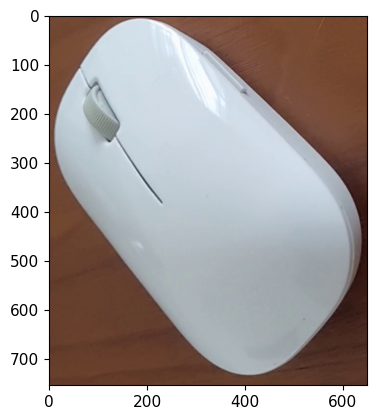

in


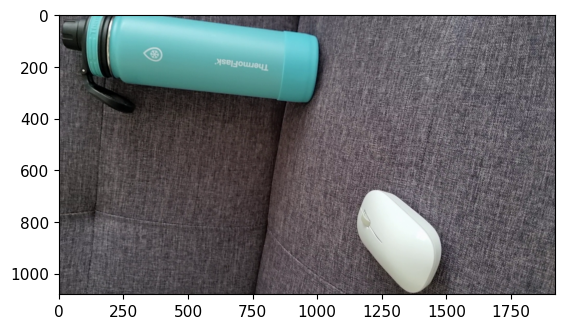

objects found by yolov5 3
probability of this object being the one: tensor(0.09372)


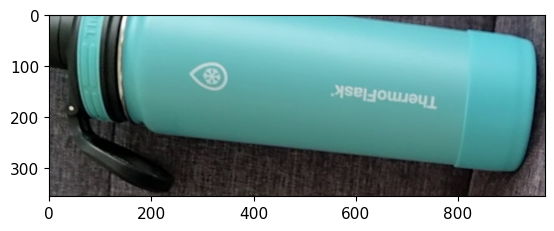

probability of this object being the one: tensor(0.14148)


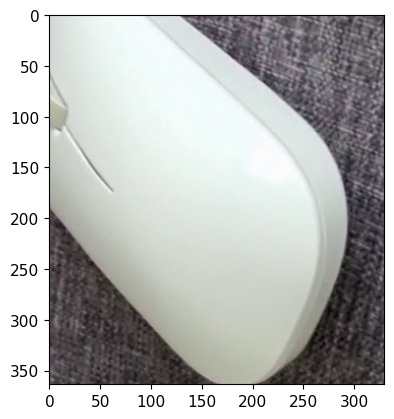

probability of this object being the one: tensor(0.76480)


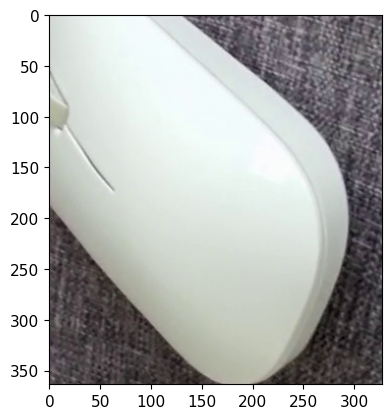

In [57]:
test_image = np.array(frames[85])

print('trying to find')
obj_img = read_image(obj_folder+os.listdir(obj_folder)[1])[:3, :, :].permute(0,2,1)
plt.imshow(obj_img.permute(1,2,0))
plt.show()

print('in')
plt.imshow(torch.from_numpy(test_image).permute(1,2,0))
plt.show()

xy_coords, conf_scores = model.inference()
print('objects found by yolov5', len(xy_coords))

normalized_score = torch.cat(conf_scores, -1) / torch.cat(conf_scores, -1).sum(dim=0, keepdim=True)

for i in range(len(xy_coords)): 
    print('probability of this object being the one:', normalized_score[i])
    x1, y1, x2, y2 = [round(x.item()) for x in xy_coords[i]]
    img = test_image[:, y1:y2, x1:x2]
    plt.imshow(torch.from_numpy(img).permute(1,2,0))
    plt.show()